# Task 1 - Data Analysis and Preprocessing

# Import necessary libraries

In [1]:
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import ipaddress

# 1. Load the dataset

In [ ]:
fraud_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\Fraud_Data.csv')
ip_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\IpAddress_to_Country.csv')

In [4]:
# 2. Handle Missing Values
print("Before Handling Missing Values:")
print(fraud_data.isnull().sum())

Before Handling Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


# Display the first few rows of the dataset

In [ ]:
# the first 7 rows of the dataset
fraud_data.head(7)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0


In [12]:
ip_data.head(7)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China


In [13]:
# Dataset Information
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


# 2. Cleaning the Data

In [15]:
# Check for missing values in the dataset
missing_values = fraud_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found in the dataset.


# Correct data types

In [16]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Verify the data types after conversion
print("Data Types After Conversion:")
print(fraud_data.dtypes)

Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [17]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    fraud_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


# summary Statistics

In [18]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [19]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,CQTUVBYIWWWBC,SEO,Chrome,M
freq,20,60615,61432,88293


# 3. Exploratory Data Analysis (EDA)

In [104]:
class DataVisualizer:
    def __init__(self, data, numerical_features, categorical_features, target_col, logger=None):
        self.data = data
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        self.target_col = target_col
        self.logger = logger

    def _plot_histograms(self):
        for feature in self.numerical_features:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.data[feature], bins=30, kde=True)
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
    def _plot_counts(self):
        for feature in self.categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=self.data, x=feature)
            plt.title(f'Count of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=45)  # Rotate labels for better visibility
            plt.grid(True)
            plt.show()
    def _plot_scatter(self, x_feature, y_feature):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x=x_feature, y=y_feature)
        plt.title(f'Scatter Plot of {y_feature} vs {x_feature}')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.grid(True)
        plt.show()

    def _plot_box(self, categorical_feature, numerical_feature):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.data, x=categorical_feature, y=numerical_feature)
        plt.title(f'Box Plot of {numerical_feature} by {categorical_feature}')
        plt.xlabel(categorical_feature)
        plt.ylabel(numerical_feature)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    def _plot_pairwise(self):
        sns.pairplot(self.data[self.numerical_features])
        plt.title('Pairwise Plot')
        plt.show()
    def _plot_correlation_heatmap(self):
        correlation_matrix = self.data[self.numerical_features].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
        plt.title('Correlation Heatmap')
        plt.show()
    def _plot_distribution_by_class(self):
     for feature in self.numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.data, x=feature, hue=self.target_col, kde=True, stat="density", common_norm=False)
        plt.title(f'Distribution of {feature} by {self.target_col}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend(title=self.target_col)
        plt.grid(True)
        plt.show()
    def _plot_browser_usage_by_target(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.data, x='browser', hue=self.target_col)
        plt.title('Browser Usage by Target Variable')
        plt.xlabel('Browser')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=self.target_col)
        plt.grid(True)
        plt.show()   
    def _plot_purchase_value_by_target(self):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.data, x=self.target_col, y='purchase_value')
        plt.title('Purchase Value Distribution by Target Variable')
        plt.xlabel(self.target_col)
        plt.ylabel('Purchase Value')
        plt.grid(True)
        plt.show()
    def _plot_source_browser_heatmap(self):
        # Create a cross-tabulation
        crosstab = pd.crosstab(self.data['source'], self.data['browser'])

        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
        plt.title('Heatmap of Source vs Browser')
        plt.xlabel('Browser')
        plt.ylabel('Source')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()
    def plot_purchase_delay_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['purchase_delay'], bins=30, kde=True)
        plt.title('Distribution of Purchase Delay')
        plt.xlabel('Purchase Delay')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    def plot_purchase_patterns_over_time(self):
    # Ensure purchase_time is in datetime format
        self.data['purchase_time'] = pd.to_datetime(self.data['purchase_time'])
    
    # Aggregate purchase values by date
        daily_purchase = self.data.groupby(self.data['purchase_time'].dt.date)['purchase_value'].sum().reset_index()
    
    # Plotting
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=daily_purchase, x='purchase_time', y='purchase_value')
        plt.title('Purchase Patterns Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Purchase Value')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    def plot_purchase_patterns_over_days_of_week(self):
        # Ensure purchase_time is in datetime format
        self.data['purchase_time'] = pd.to_datetime(self.data['purchase_time'])

        # Extract the day of the week and aggregate purchase values
        self.data['day_of_week'] = self.data['purchase_time'].dt.day_name()
        weekly_purchase = self.data.groupby('day_of_week')['purchase_value'].sum().reindex(
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        ).reset_index()

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(data=weekly_purchase, x='day_of_week', y='purchase_value', palette='viridis')
        plt.title('Total Purchase Value by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Total Purchase Value')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()
# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Logger (optional, set to None if not using)
logger = None  

# Create instance of DataVisualizer
visualizer = DataVisualizer(fraud_data, numerical_features, categorical_features, 'class', logger)




# Univariate Analysis

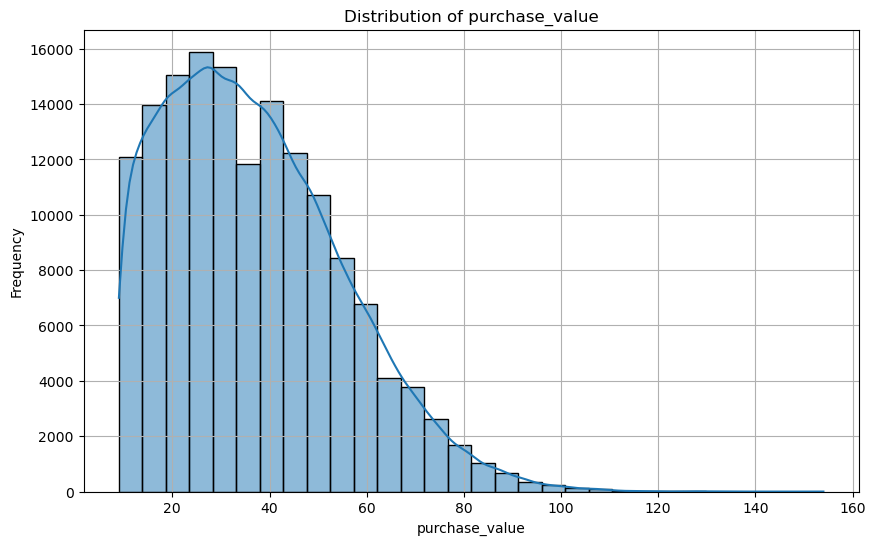

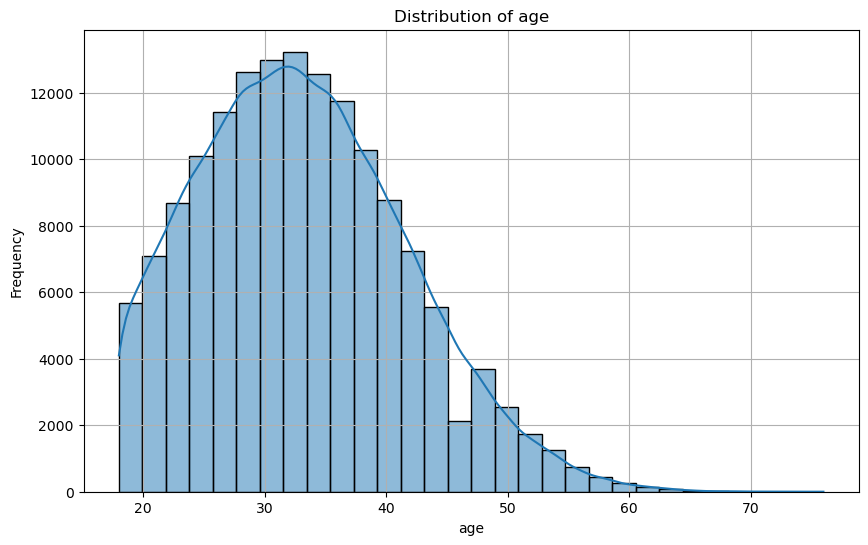

In [96]:
# Plot histograms for numerical features
visualizer._plot_histograms()  # To plot histograms

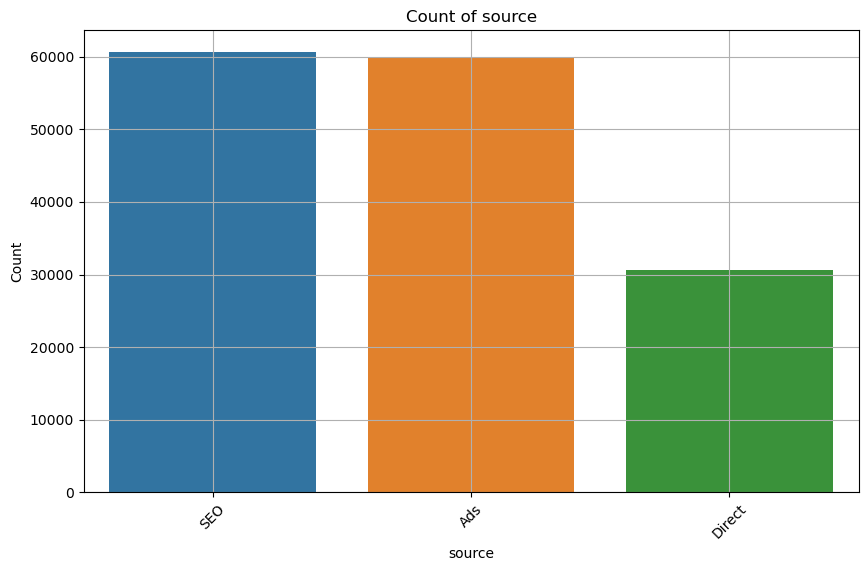

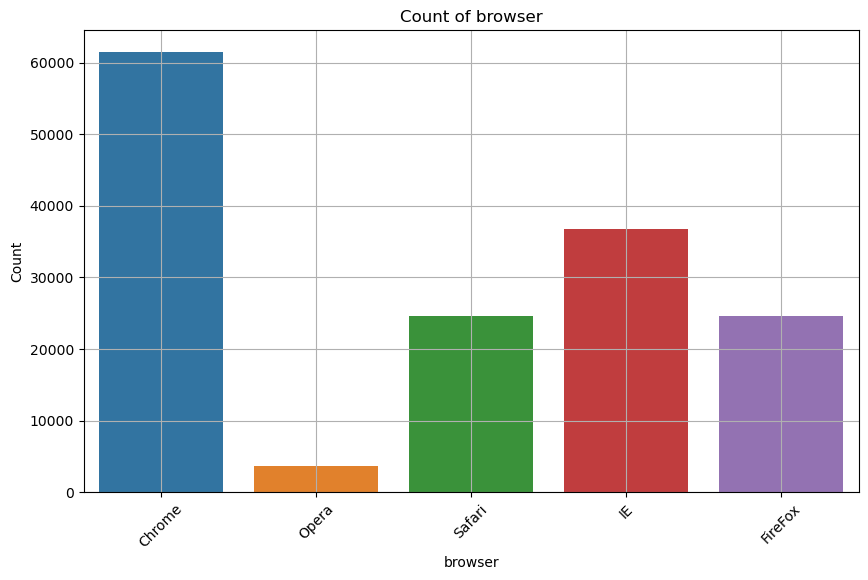

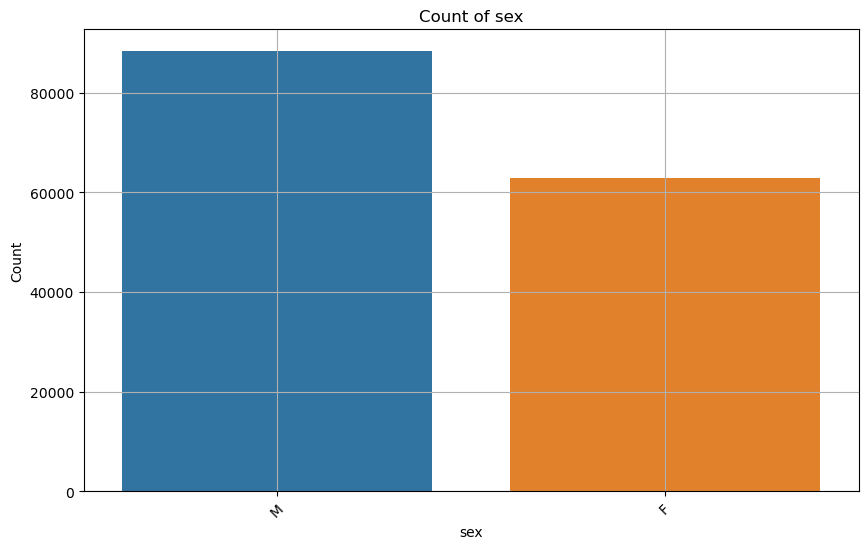

In [40]:
# Plot counts for categorical features
visualizer._plot_counts()  # To plot counts for categorical features

# Bivariate analysis

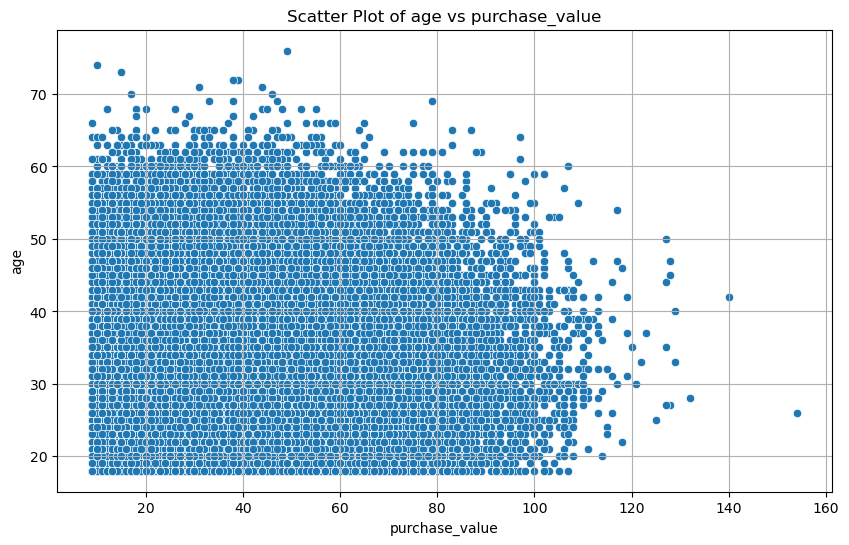

In [58]:
# Sample call to the scatter plot method
visualizer._plot_scatter('purchase_value', 'age')  

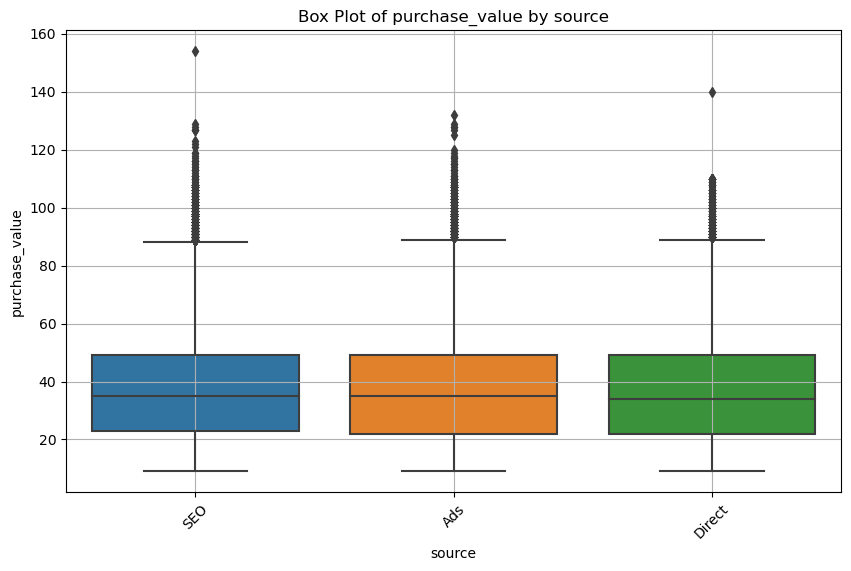

In [65]:
# Box Plot Example
visualizer._plot_box('source', 'purchase_value')  

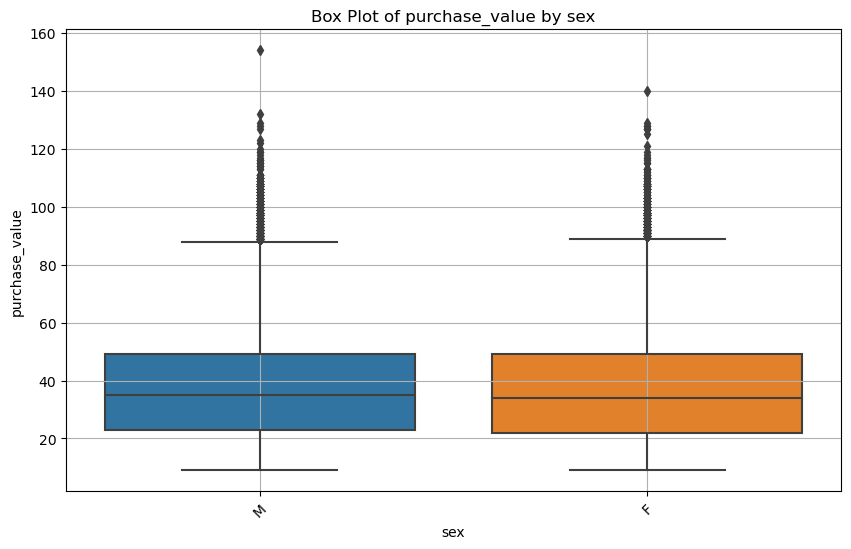

In [ ]:
# Box Plot Example
visualizer._plot_box('sex', 'purchase_value') 

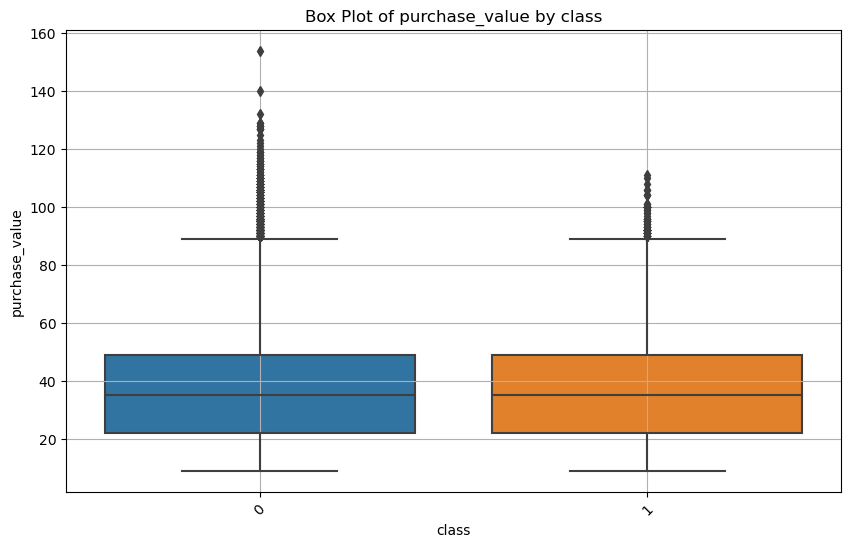

In [67]:
# Box Plot Example
visualizer._plot_box('class', 'purchase_value')

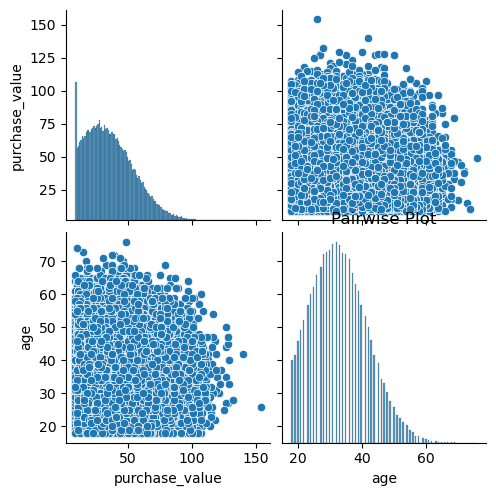

In [73]:
# Pairwise relationship
visualizer._plot_pairwise()

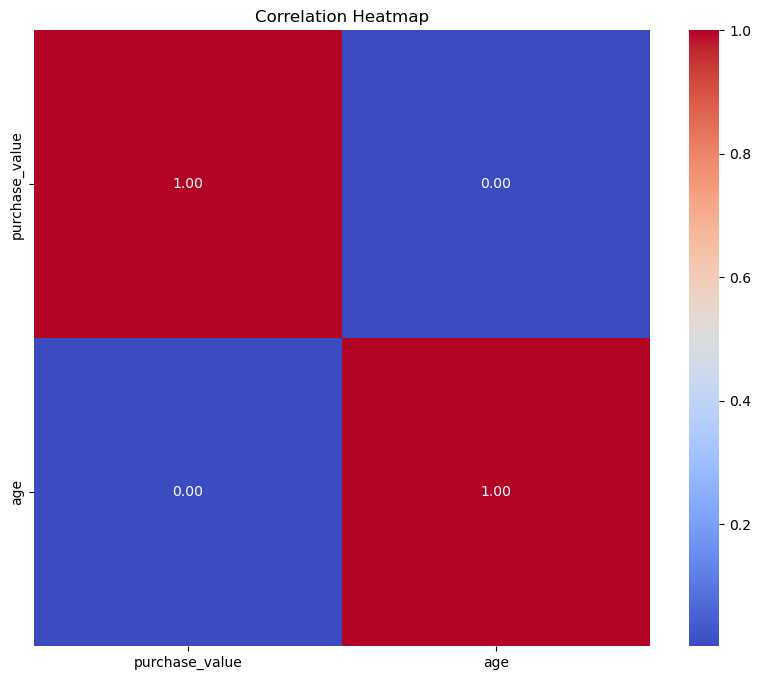

In [74]:
# Correlation Heatmap
visualizer._plot_correlation_heatmap()  # For numerical features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


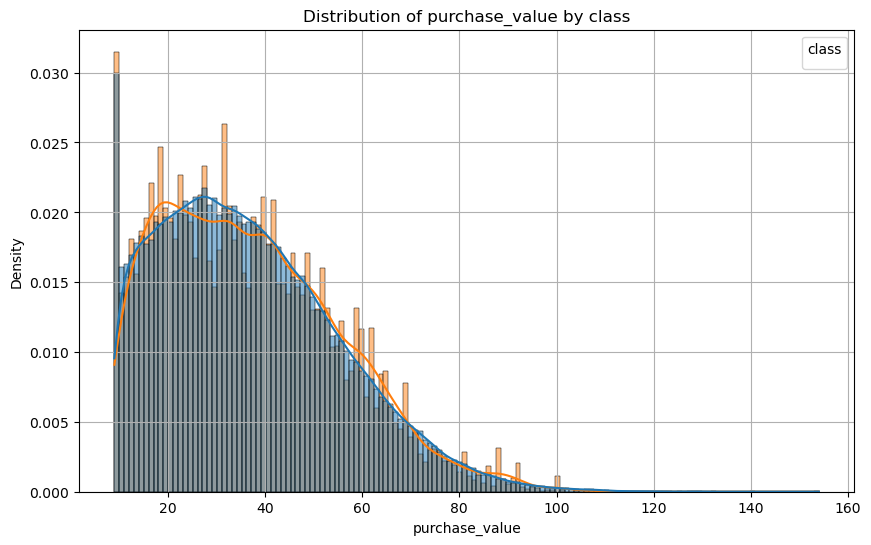

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


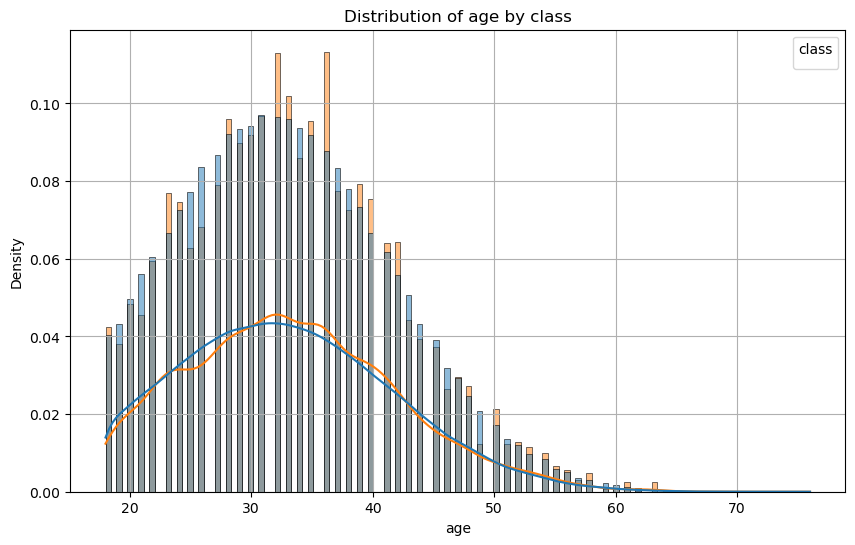

In [78]:
# visualizer plot_distribution_by_class()
visualizer._plot_distribution_by_class()

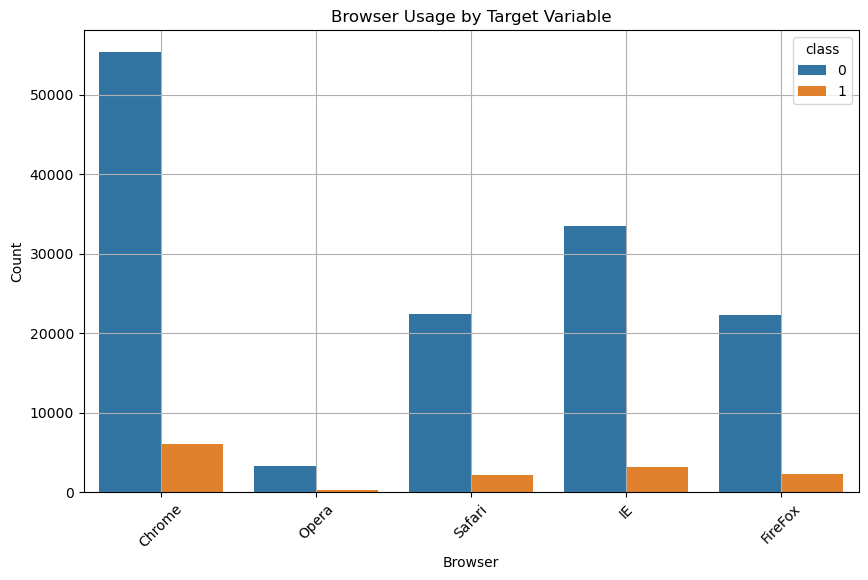

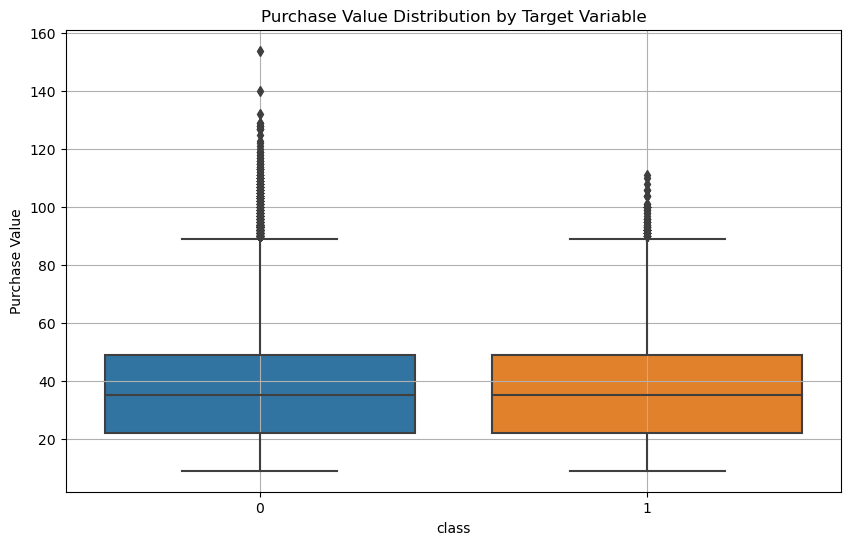

In [84]:
# Browser usage and Purchase value distribution by target variable
visualizer._plot_browser_usage_by_target()  # Browser usage by target
visualizer._plot_purchase_value_by_target()

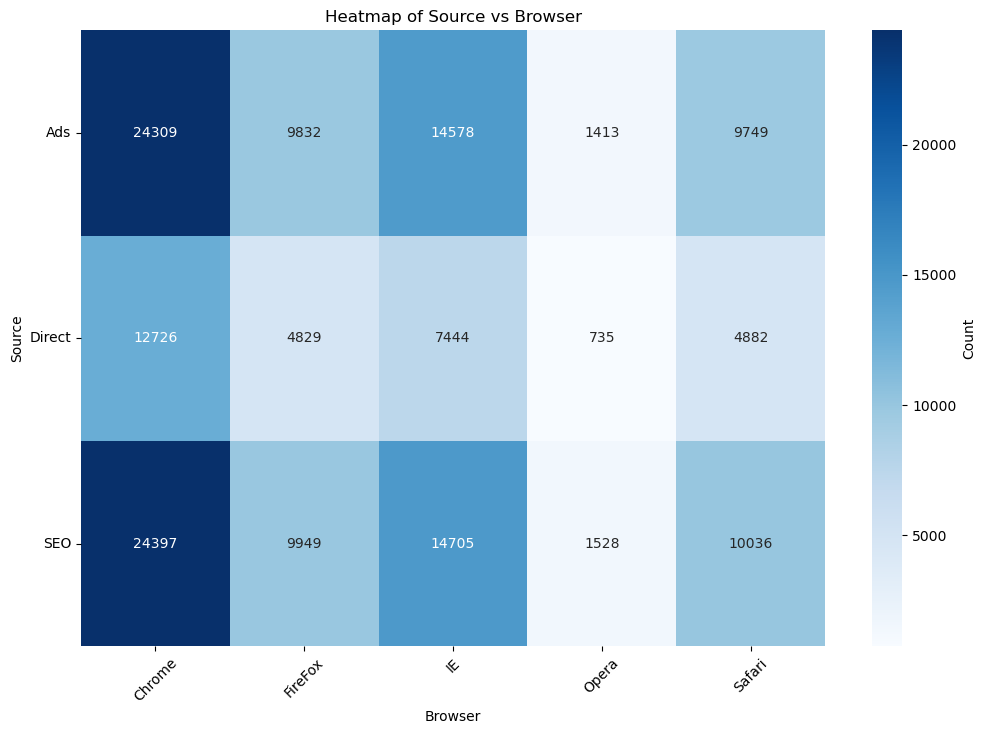

In [86]:
# Cross-tabulation and heatmap for source and browser
visualizer._plot_source_browser_heatmap()  # Source vs Browser heatmap

In [93]:
# Convert to datetime if not already in that format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Calculate purchase delay in seconds or desired unit (e.g., days)
fraud_data['purchase_delay'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

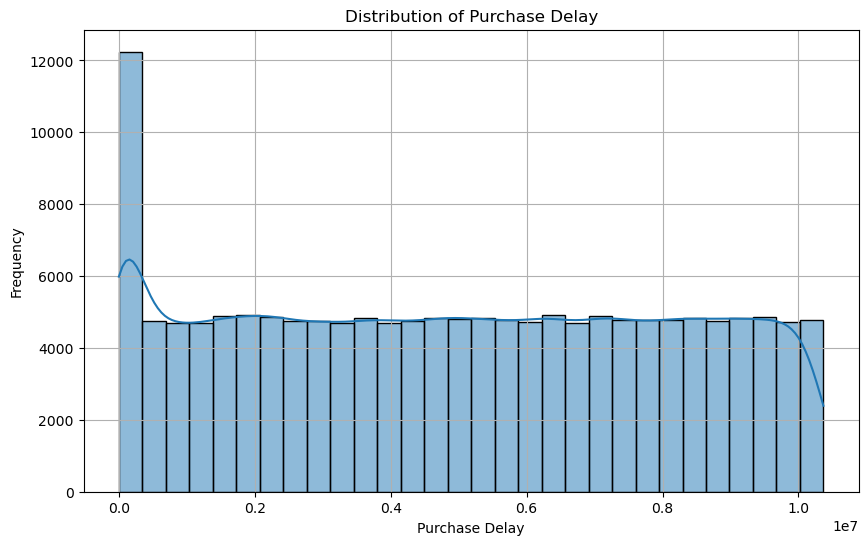

In [94]:
# Plotting the purchase delay distribution
visualizer.plot_purchase_delay_distribution()  # Call the method

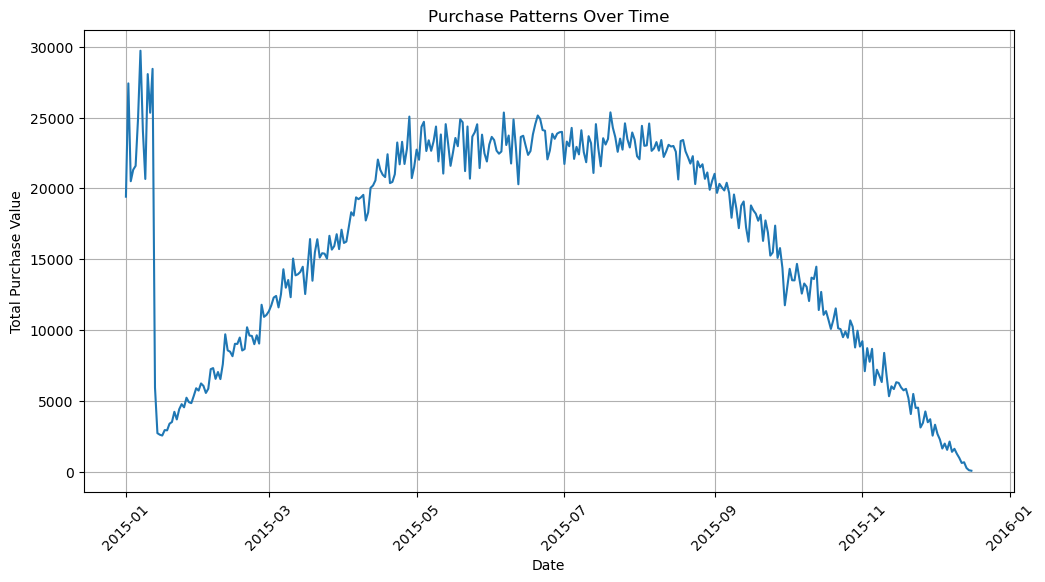

In [99]:
visualizer.plot_purchase_patterns_over_time()

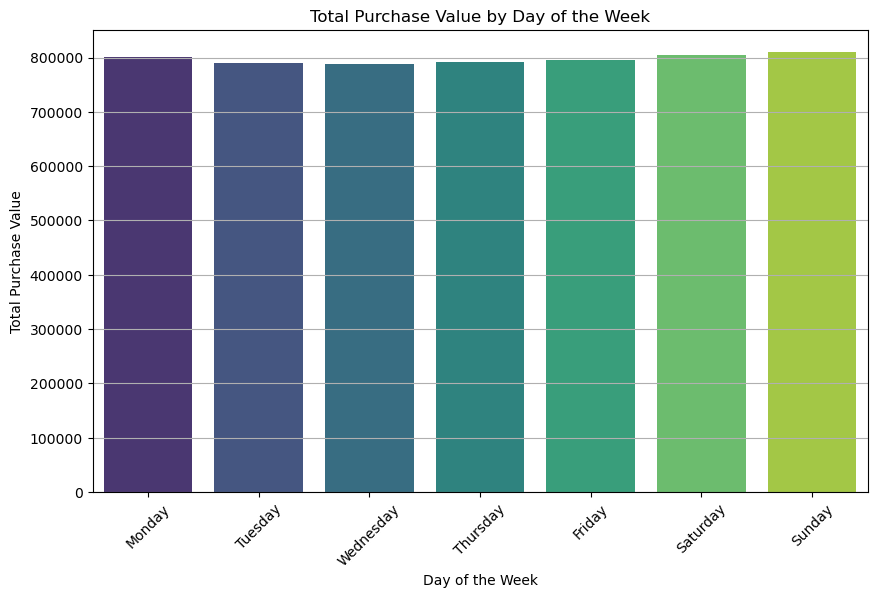

In [105]:
visualizer.plot_purchase_patterns_over_days_of_week()

# Merge Datasets for Geolocation Analysis

In [115]:
# Load the datasets
fraud_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\Fraud_Data.csv')
ip_country_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\\IpAddress_to_Country.csv')

In [113]:
def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        # Return None or a placeholder for invalid IPs
        return None

In [ ]:
import socket
import struct

def ip_to_int(ip):
    """Convert an IP address to its integer representation."""
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None  # Handle invalid IPs gracefully

# Load the datasets
try:
    fraud_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\Fraud_Data.csv')
    ip_country_data = pd.read_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\IpAddress_to_Country.csv')
except Exception as e:
    print(f"Error loading datasets: {e}")

# Convert IP addresses in fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if not pd.isna(x) else None)

# Drop rows with invalid IPs
fraud_data.dropna(subset=['ip_int'], inplace=True)

# Convert bounds in the country data to integer
ip_country_data['lower_bound_ip_address'] = ip_country_data['lower_bound_ip_address'].astype('int64')
ip_country_data['upper_bound_ip_address'] = ip_country_data['upper_bound_ip_address'].astype('int64')

# Ensure fraud_data's ip_int is also int64
fraud_data['ip_int'] = fraud_data['ip_int'].astype('int64')

# Sort both datasets for merge_asof
fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)

# Merge the datasets using merge_asof
merged_data = pd.merge_asof(
    fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int is within the lower and upper bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                          (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]

# Drop unnecessary columns
merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

# OPTIONAL: Save to csv file
merged_data.to_csv(r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\merged_fraud_data.csv', index=False)

# Display the first few rows of the merged dataset with country information
print(merged_data.head())

     user_id          signup_time        purchase_time  purchase_value  \
634   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
635   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
636   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
637    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
638   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class    ip_int  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0  16778864   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0  16842045   
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0  16843656   
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0  16938732   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0  16971984   

       country  
634  Australia  
635   Thailand  
636      China  
637      China  
6

<Figure size 1400x700 with 0 Axes>

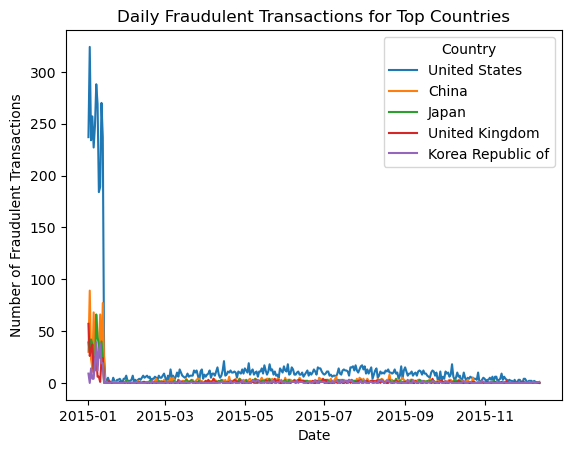

In [127]:
# Convert 'purchase_time' to datetime format
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Group fraudulent transactions by day and country
daily_fraud = merged_data[merged_data['class'] == 1].groupby([merged_data['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(5).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(14, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

In [4]:
import geopandas as gpd

# Load the datasets
fraud_data_path = r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\Fraud_Data.csv'
world_data_path = r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\ne_10m_admin_0_countries.shp'
# Load your data as DataFrames
fraud_data = pd.read_csv(fraud_data_path)
world_data = gpd.read_file(world_data_path)
# Update this path to the location where you saved the shapefile
world_data_path = r'C:\Users\yami\Desktop\KIAM 3\week 8 & 9\Data\ne_10m_admin_0_countries.shp'  # Adjust if necessary

# Load the shapefile into a GeoDataFrame
world_data = gpd.read_file(world_data_path)

# Display the first few rows of the GeoDataFrame
print(world_data.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

In [6]:
class GeolocationAnalyzer:
    def __init__(self, fraud_data, world_gdata):
        self.fraud_data = fraud_data
        self.world_gdata = world_gdata

    def calculate_transaction_volume(self):
        # Group by the new country column
        transaction_volume = self.fraud_data.groupby('country')['purchase_value'].sum().reset_index()
        transaction_volume.columns = ['country', 'transaction_volume']
        
        # Merge with world GeoDataFrame
        merged_data = self.world_gdata.merge(transaction_volume, how='left', left_on='ADMIN', right_on='country')
        
        return merged_data

    def plot_transaction_volume_map(self):
        merged_data = self.calculate_transaction_volume()
        
        # Plotting
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))
        self.world_gdata.boundary.plot(ax=ax, linewidth=1)
        merged_data.plot(column='transaction_volume', ax=ax, legend=True,
                         legend_kwds={'label': "Transaction Volume by Country",
                                      'orientation': "horizontal"},
                         missing_kwds={'color': 'lightgrey'})
        
        plt.title("Transaction Volume by Country")
        plt.show()

In [1]:
import geopandas as gpd
print(gpd.__version__)

1.0.1


In [ ]:
# Load your data
fraud_data = pd.read_csv(fraud_data_path)  # Ensure fraud_data_path is defined
world_gdata = gpd.read_file(world_data_path)  # Ensure world_data_path is defined

# Define the GeolocationAnalyzer class
class GeolocationAnalyzer:
    def __init__(self, fraud_data, world_gdata):
        self.fraud_data = fraud_data
        self.world_gdata = world_gdata

    def calculate_transaction_volume(self):
        transaction_volume = self.fraud_data.groupby('country')['purchase_value'].sum().reset_index()
        transaction_volume.columns = ['country', 'transaction_volume']
        
        merged_data = self.world_gdata.merge(transaction_volume, how='left', left_on='ADMIN', right_on='country')
        
        return merged_data

    def plot_transaction_volume_map(self):
        merged_data = self.calculate_transaction_volume()
        
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))
        self.world_gdata.boundary.plot(ax=ax, linewidth=1)
        merged_data.plot(column='transaction_volume', ax=ax, legend=True,
                         legend_kwds={'label': "Transaction Volume by Country",
                                      'orientation': "horizontal"},
                         missing_kwds={'color': 'lightgrey'})
        
        plt.title("Transaction Volume by Country")
        plt.show()

# Instantiate the analyzer
geo_analyzer = GeolocationAnalyzer(fraud_data, world_gdata)

# Visualize the transaction volume in each country in the world
geo_analyzer.plot_transaction_volume_map()

In [8]:
print(fraud_data.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


# Feature Engineering

In [ ]:
# Initialize the class with the DataFrame
feature_engineering = FeatureEngineering(fraud_data, logger)

# Run the pipeline to process the data
feature_engineering.pipeline()

# Retrieve the processed DataFrame
processed_data = feature_engineering.get_processed_data()

# View the processed data
display(processed_data.head())